In [39]:
import matplotlib
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from fredapi import Fred

In [3]:
fred = Fred(api_key="e12a9e0359f31b36e3f0aa5f0565a319")

In [6]:
ORgdp = fred.get_series("ORNGSP")
UTgdp = fred.get_series("UTNGSP")
IDgdp = fred.get_series("IDNGSP")
WAgdp = fred.get_series("WANGSP")
COgdp = fred.get_series("CONGSP")

In [11]:
ORgth = ORgdp.pct_change()
UTgth = UTgdp.pct_change()
IDgth = IDgdp.pct_change()
WAgth = WAgdp.pct_change()
COgth = COgdp.pct_change()

I am interested in seeing gdp growth rates in each state, hence the pct change feature

In [17]:
money = [ORgth, UTgth, IDgth, WAgth, COgth]
money_df = pd.concat(money, axis = 1)
print(money_df.head())

                   0         1         2         3         4
1997-01-01       NaN       NaN       NaN       NaN       NaN
1998-01-01  0.041857  0.079579  0.052478  0.084103  0.100284
1999-01-01  0.023164  0.059899  0.101804  0.096810  0.092066
2000-01-01  0.090305  0.064663  0.112912  0.031563  0.099732
2001-01-01  0.000140  0.041743 -0.016021  0.006702  0.038572


The reason there are no data for 1997 is because it is yearly growth rates and 1997 is the first year in the data set.

In [21]:
money_df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
dtype: object

In [100]:
money_df.rename(columns={0:'Oregon Growth', 1:'Utah Growth', 2:'Idaho Growth', 
                         3: 'Washington Growth', 4 :'Colorado Growth'}, 
                 index={0:'zero',1:'one'}, 
                 inplace=True)
print(money_df.head(4))

            Oregon Growth  Utah Growth  Idaho Growth  Washington Growth  \
1997-01-01            NaN          NaN           NaN                NaN   
1998-01-01       0.041857     0.079579      0.052478           0.084103   
1999-01-01       0.023164     0.059899      0.101804           0.096810   
2000-01-01       0.090305     0.064663      0.112912           0.031563   

            Colorado Growth  
1997-01-01              NaN  
1998-01-01         0.100284  
1999-01-01         0.092066  
2000-01-01         0.099732  


Renaming the columns to make the tables and graphs more intuitive later on.

In [36]:
money_df.isnull()

,Oregon Growth,Utah Growth,Idaho Growth,Washington Growth,Colorado Growth
1997-01-01,True,True,True,True,True
1998-01-01,False,False,False,False,False
1999-01-01,False,False,False,False,False
2000-01-01,False,False,False,False,False
2001-01-01,False,False,False,False,False
2002-01-01,False,False,False,False,False
2003-01-01,False,False,False,False,False
2004-01-01,False,False,False,False,False
2005-01-01,False,False,False,False,False
2006-01-01,False,False,False,False,False


As stated previously, the only area where there are no data is for 1997. I will simply drop the data from that year because the sample size is small and can vary easily, I do not want to use the mean or any other summary statistic to fill in for the missing values.

In [101]:
money1_df = money_df.dropna()

In [102]:
money1_df.describe()

,Oregon Growth,Utah Growth,Idaho Growth,Washington Growth,Colorado Growth
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.041776,0.054357,0.046518,0.051347,0.047830
std,0.028001,0.031363,0.035441,0.027823,0.030000
min,-0.027535,-0.022869,-0.031883,-0.005752,-0.027285
25%,0.023065,0.041297,0.030080,0.035878,0.034059
50%,0.041663,0.052810,0.043386,0.046786,0.038639
75%,0.056616,0.068392,0.058018,0.066651,0.063017
max,0.090305,0.126645,0.112912,0.096810,0.100284


The min and max are reasonable GDP growth rates, especially considering the dot.com boom of the late nineties and the Great Recession of the mid 2000's. The mean GDP growth also falls in line with what is to be expected.

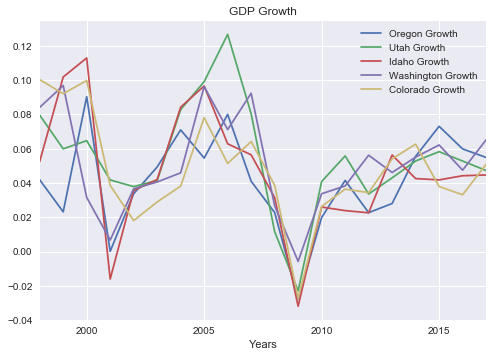

In [103]:
money1_df.plot()
plt.title("GDP Growth")
plt.xlabel("Years")
plt.show()

/Users/alexhumble/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


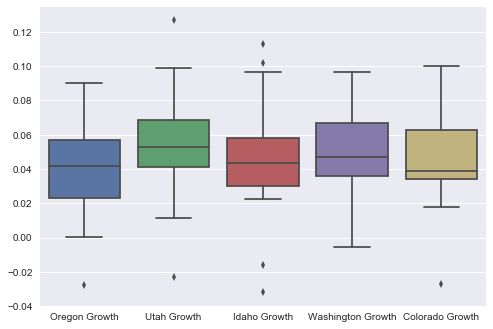

In [104]:
sns.boxplot(money1_df)
plt.show()

The boxplots do a great job of displaying the summary statistics from above. The inner quartile range reveals pretty consistent growth is common in most years between 3 and 6%

In [105]:
money1_df.corr()

,Oregon Growth,Utah Growth,Idaho Growth,Washington Growth,Colorado Growth
Oregon Growth,1.000000,0.724776,0.712551,0.440857,0.507535
Utah Growth,0.724776,1.000000,0.674729,0.709044,0.633675
Idaho Growth,0.712551,0.674729,1.000000,0.663037,0.776627
Washington Growth,0.440857,0.709044,0.663037,1.000000,0.687285
Colorado Growth,0.507535,0.633675,0.776627,0.687285,1.000000


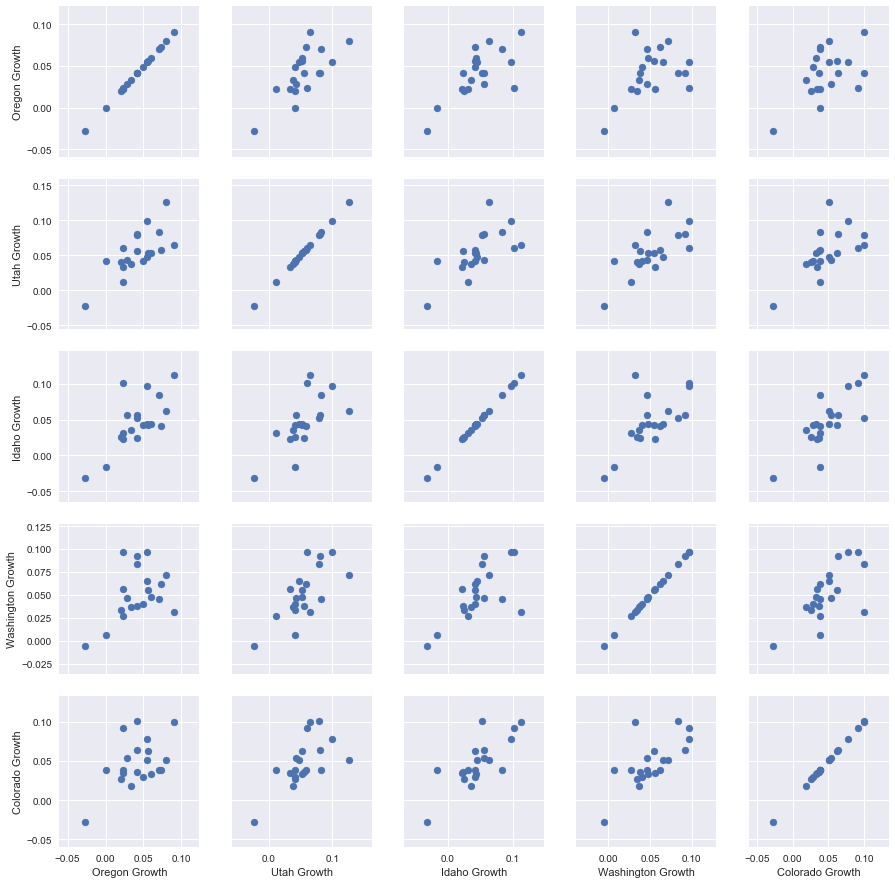

In [106]:
correlation = sns.PairGrid(money1_df)
correlation.map(plt.scatter)
plt.show()

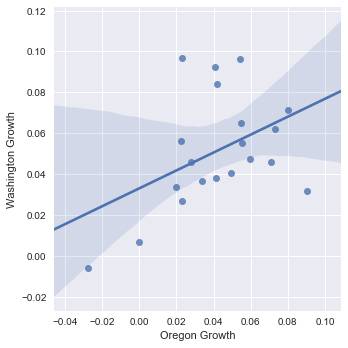

In [107]:
sns.lmplot(x="Oregon Growth", y="Washington Growth", data=money1_df)
plt.show()

It is interesting to note the stronger covariance between Oregon and Utah than Oregon and Washington. I would have expected that bordering states in similar geographical regions would have higher covariances than those of states in different geographical regions such as Utah and Oregon.

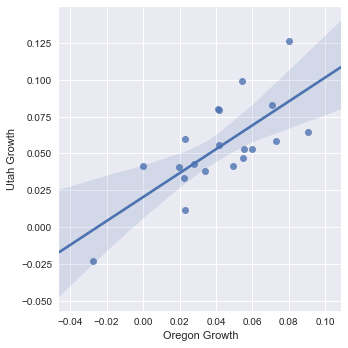

In [108]:
sns.lmplot(x="Oregon Growth", y="Utah Growth", data=money1_df)
plt.show()

Variance in Utah GDP Growth


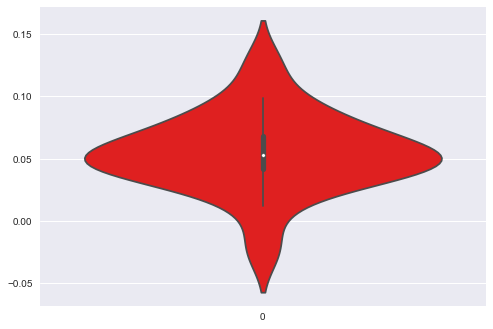

In [109]:
print('Variance in Utah GDP Growth')
sns.violinplot(data = money1_df['Utah Growth'], color = 'red')
plt.show()

Variance in Oregon GDP Growth


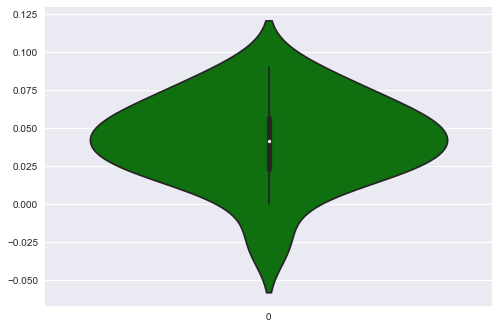

In [110]:
print('Variance in Oregon GDP Growth')
sns.violinplot(data = money1_df['Oregon Growth'], color = 'Green')
plt.show()

Variance in Colorado GDP Growth


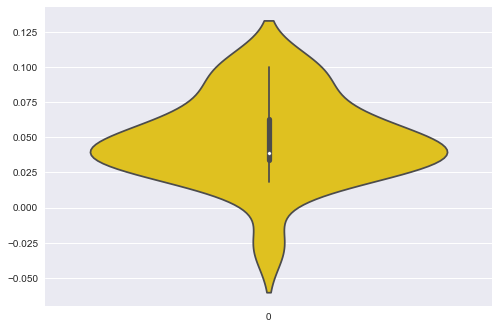

In [111]:
print('Variance in Colorado GDP Growth')
sns.violinplot(data = money1_df['Colorado Growth'], color = 'gold')
plt.show()

Variance in Washington GDP Growth


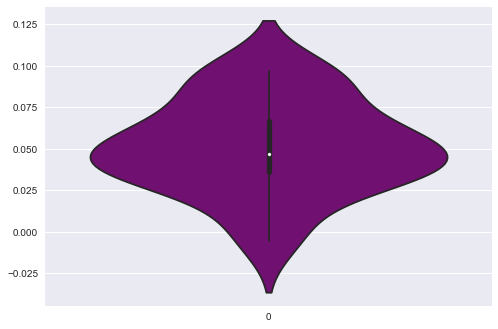

In [112]:
print('Variance in Washington GDP Growth')
sns.violinplot(data = money1_df['Washington Growth'], color = 'Purple')
plt.show()

Variance in Idaho GDP Growth


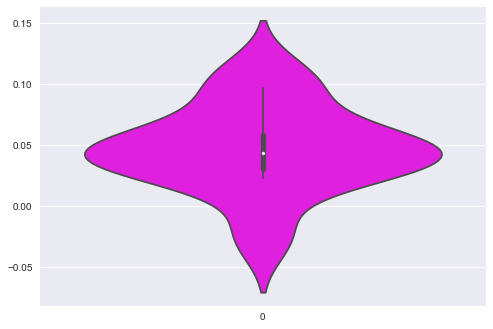

In [113]:
print('Variance in Idaho GDP Growth')
sns.violinplot(data = money1_df['Idaho Growth'], color = 'Magenta')
plt.show()

The violin plots show that the variance of each state's gdp growth ratea are pretty similar. This is no surprise given the covariance between each state's gdp growth. Furthermore, it shows that all states GDP growth rates are single mode variables.